# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
from tensorflow.keras import Sequential, Input

import time 


2025-04-25 18:21:07.897799: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 18:21:07.900892: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 18:21:07.907989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745580067.918215   20741 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745580067.921284   20741 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745580067.930160   20741 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

# 2. Dataset

In [2]:
data = pd.read_csv('datasets/Dataset1/Dataset1.csv')

data.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [3]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


# 3. Data Preprocessing

In [4]:
# Label encode target churn
data['churn'] = LabelEncoder().fit_transform(data['churn'])

# Split fitur dan target
y = data['churn']
X = data.drop('churn', axis=1)

# Fill missing values
X = X.fillna(0)

# One-hot encode categorical
X = pd.get_dummies(X)

# Train-test split 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standarisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0


# 4. Method

## 4.1. SVM

In [ ]:
start_time = time.time()

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train, y_train)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

Training Time: 98.37 seconds
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      9668
           1       0.93      0.93      0.93     12015

    accuracy                           0.92     21683
   macro avg       0.92      0.92      0.92     21683
weighted avg       0.92      0.92      0.92     21683

[[ 8835   833]
 [  823 11192]]


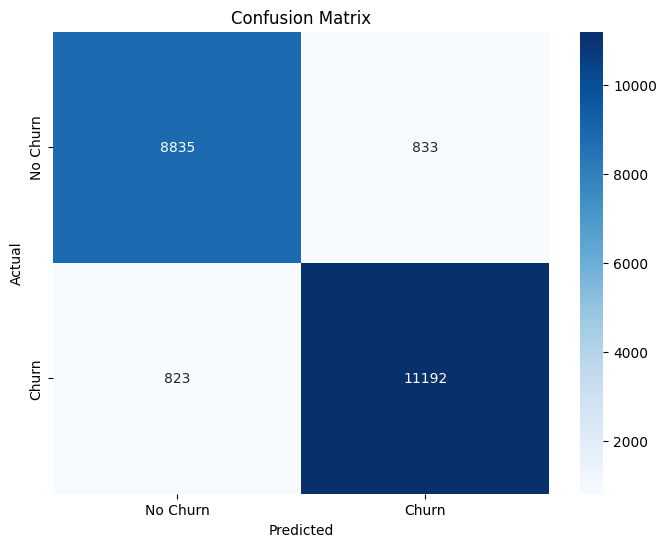

In [6]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 4.2. MLP

In [ ]:
start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=200, random_state=42)
mlp.fit(X_train, y_train)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")

y_pred = mlp.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_pred))

Training Time: 15.71 seconds
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9668
           1       0.99      0.98      0.98     12015

    accuracy                           0.98     21683
   macro avg       0.98      0.98      0.98     21683
weighted avg       0.98      0.98      0.98     21683

[[ 9551   117]
 [  244 11771]]


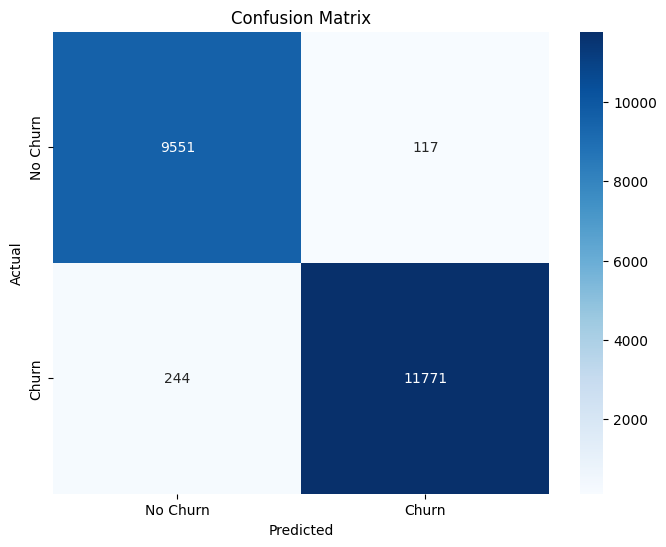

In [8]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 4.3. CNN

In [ ]:
# reshape untuk CNN-1D
timesteps = X_train.shape[1]

X_train_cnn = X_train.reshape(-1, timesteps, 1).astype('float32')
X_test_cnn = X_test.reshape(-1, timesteps, 1).astype('float32')

# encode one-hot target
y_train_cat = to_categorical(y_train.astype(int))
y_test_cat = to_categorical(y_test.astype(int))

start_time = time.time()

model_cnn = Sequential([
    Input(shape=(timesteps, 1)),
    Conv1D(32, 3, activation='relu'),
    Dropout(0.3),
    Conv1D(64, 3, activation='relu'),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(2, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train_cat, epochs=25, batch_size=32, validation_split=0.2)

end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")


# Evaluasi
y_cnn_pred = np.argmax(model_cnn.predict(X_test_cnn), axis=1)
print(classification_report(y_test, y_pred, digits=4))
print(confusion_matrix(y_test, y_cnn_pred))

Epoch 1/25


E0000 00:00:1745580189.327415   20741 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745580189.330916   20741 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1265/1265 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8870 - loss: 0.2974 - val_accuracy: 0.9246 - val_loss: 0.2092
Epoch 2/25
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9145 - loss: 0.2287 - val_accuracy: 0.9308 - val_loss: 0.1948
Epoch 3/25
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9183 - loss: 0.2149 - val_accuracy: 0.9326 - val_loss: 0.1826
Epoch 4/25
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9236 - loss: 0.2019 - val_accuracy: 0.9344 - val_loss: 0.1723
Epoch 5/25
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9260 - loss: 0.1949 - val_accuracy: 0.9389 - val_loss: 0.1651
Epoch 6/25
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9294 - loss: 0.1832 - val_accuracy: 0.9399 - val_loss: 0.1511
Epoch 7/25
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9333 - loss: 0.1730 - val_accuracy: 0.9460 - val_loss: 0.1553
Epoch 8/25
1265/1265 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9378 - loss: 0.1677 - val_accurac

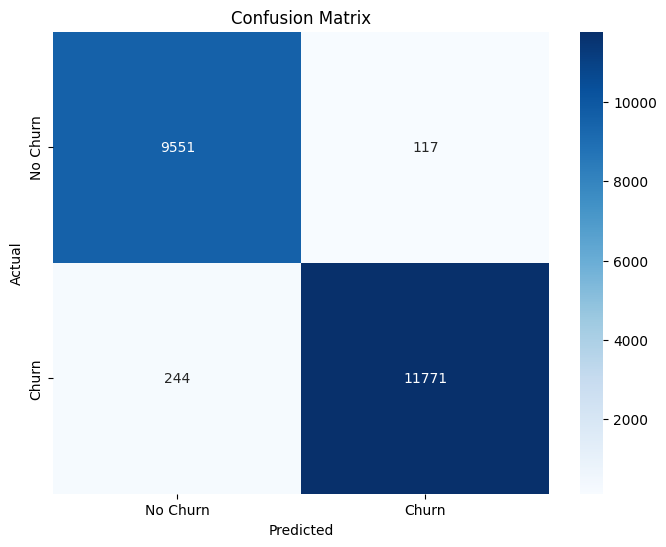

In [10]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
svm_probs = svm.predict_proba(X_test)[:,1]
print("SVM ROC-AUC:", roc_auc_score(y_test, svm_probs))

SVM ROC-AUC: 0.9773056658765565
